In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import time
start_time = time.time()

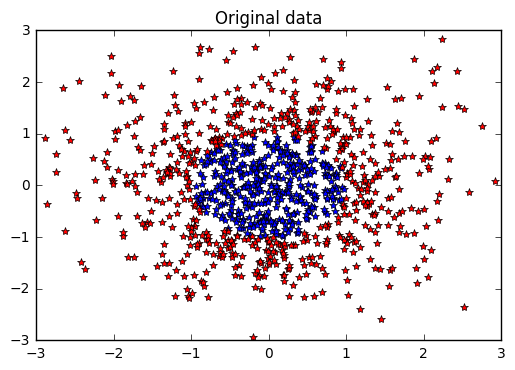

In [2]:
T = 20  
dim = 2
N = 1000

x = np.random.randn(N, 2)  # dim=2

label = np.zeros(N, dtype=np.int64)

# label = x[:,0] < x[:,1]  #linear separation example
label = (x[:, 0]**2 + x[:, 1]**2) < 1  # nonlinear separation example


label = label * 1.0

pos1 = np.nonzero(label == 1)
pos2 = np.where(label == 0)
label[pos2] = -1

# Plot the data

plt.figure()
plt.plot(x[pos1, 0], x[pos1, 1], 'b*')
plt.plot(x[pos2, 0], x[pos2, 1], 'r*')
plt.axis([-3, 3, -3, 3])
plt.title("Original data")

In [3]:
temp = np.zeros(N, dtype=np.int64)


# Returns error and calculated labels corresponding to
def weakClassifier_error(i, j, k, x, weight, label):
                                                # threshold i
                                                # dimension j
                                                # sign k on dataset x.
                                                # Original labels are stored in
                                                # label

    temp_err = np.float64(0)
    # Initialise actual and expected labels to a perfect match( 0 = match , 1
    # = not a match)
    y = np.zeros(N, dtype=np.int64)

    if(k == 1):
        temp = (x[:, j] >= i)
    else:
        temp = (x[:, j] < i)

    temp = np.int64(temp)
    temp[np.where(temp == 0)] = -1
    y = np.int64(temp != label)
    # Calculate error of this weak classifier on the weighted dataset
    temp_err = np.sum(y * weight)

    return [temp_err, y]

In [5]:
# Actual program begins

# h and alpha together completely specify the final strong classifier
h = np.zeros([T, 3], dtype=np.float64)
alpha = np.zeros(T, dtype=np.float64)

threshold = np.arange(-3.0, 3.0, 0.1)

weight = np.ones(N, dtype=np.float64) / (N)  # Initialise weights

# Initially set error to infinity, to allow comparing with error of classifiers
err = np.ones(T, dtype=np.float64) * np.inf

for t in range(T):
    for i in threshold:
        for j in range(dim):
            for k in [-1, 1]:
                [tmpe, y] = weakClassifier_error(i, j, k, x, weight, label)
                if(tmpe < err[t]):  # storing the better classifier in h
                    err[t] = tmpe
                    y0 = y
                    h[t][0] = i
                    h[t][1] = j
                    h[t][2] = k

    if(err[t] > 0.5):
        T = t
        # We have run out of weak classifiers! So truncate the no: of
        # iterations used
        #print t, "Error!"
        break

    alpha[t] = 0.5 * np.log((1.0 - err[t]) / err[t])

    # y0=0 corresponded to correctly labelled datapoints. To reassign weights,
    y0[np.where(y0 == 0)] = -1
    # we need -1 and not 0 at these positions

    weight = np.float64(weight * np.exp(alpha[t] * y0))  # Reassign weights

    weight = weight / np.sum(weight)  # Normalise reassigned weights

/Users/shionguha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


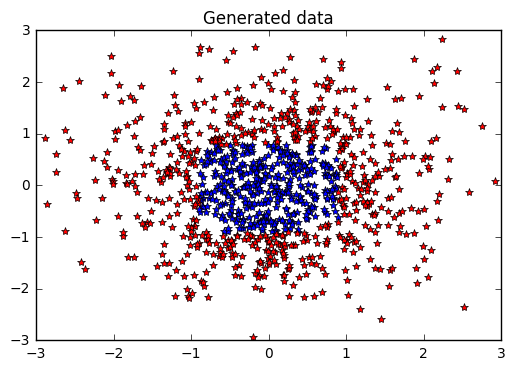

--- 165.03743600845337 seconds ---


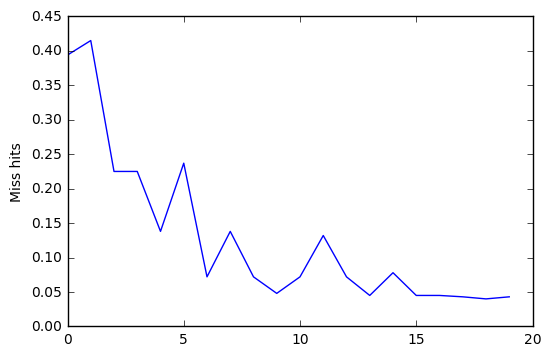

In [7]:
temp_sum = np.zeros(N, dtype=np.float64)
temp = np.zeros(N, dtype=np.float64)
final_label = np.zeros(N, dtype=np.float64)
misshits = np.zeros(T)

for t in range(T):  # Calculate final labels
    temp = h[t][2] * np.sign(x[:, h[t][1]] - h[t][0])
    temp_sum = np.float64(temp_sum + alpha[t] * temp)
    final_label = np.sign(temp_sum)
    misshits[t] = np.sum(np.float64(final_label != label)) / N


# Now plot the generated labels
pos1 = np.where(final_label == 1)
pos2 = np.where(final_label == -1)

plt.figure()
plt.plot(x[pos1, 0], x[pos1, 1], 'b*')
plt.plot(x[pos2, 0], x[pos2, 1], 'r*')
plt.axis([-3, 3, -3, 3])
plt.title("Generated data")
plt.show()

# Plot miss hits when more and more weak learners are used
plt.figure()
plt.plot(misshits)
plt.ylabel('Miss hits')

print("--- %s seconds ---" % (time.time() - start_time))